# Exploration of 8a.nu Climbing Data

Rock climbing is a physically demanding and mentally challenging sport that continues to grow in popularity year on year. Presently, the number of participants is estimated at [44.5 million](https://www.ifsc-climbing.org/index.php/about-us/key-figures) world wide. 

To accomplish the ultimate goal of 'sending' the route, climbers have to engage a variety of muscles, employ specialty techniques, and exercise control over their minds. It is an exciting and challenging sport, and, as an avid climber myself, I completely understand the appeal. 

The way many users measure their progress in the sport is by recording the routes they've climbed in an online climbing logbook. Popular platforms offering this service include theCrag, Mountain Project and UKC Logbook. Arguably the most popular and well known platform though is 8a.nu. 

The objective of this project is to explore user logged data from 8a.nu to attempt to answer a few questions about the sport of climbing. These include:
- How much do physical attibutes such as weight and height influence climbing ability?
- How do older climbers fair compared to younger climbers?
- How long does it take to climb at an impressive level?

The data was scraped from 8a.nu on 13-Sep-2017 and uploaded to [Kaggle](https://www.kaggle.com/dcohen21/8anu-climbing-logbook). Unfortunately, the scraper is not available on [Github](https://github.com/dcohen21/8a.nu-Scraper) anymore due to DMCA takedown.

# Explore the Data

The data was manipulated to include the maximum climbing grade attained by each unique user on a scale of 0 to 82. For roped climbing the scale corresponds to 0 to 9c+/10a in the French roped climbing scale. For bouldering the the scale corresponds to 0 to 9c+/10a in the Font climbing scale. The French roped climbing scale is not equal to the Font climbing scale ([See here for more information](https://www.guidedolomiti.com/en/rock-climbing-grades/)). 

In addition to the maximum grade, the data contains information about the user such as their sex, height, weight, data of birth and the year they started climbing. 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Read in the datasets
# combine both in cl
climbers = pd.read_csv("/Users/katestone/Desktop/CSV files/max_grade.csv")
grades = pd.read_csv("/Users/katestone/Desktop/CSV files/grades.csv")

# Replace values in sex and climb_type columns
climbers["sex"] = climbers["sex"].apply(lambda x: "male" if x == 0 else ("female" if x == 1 else "unknown"))
climbers["climb_type"] = climbers["climb_type"].apply(lambda x: "roped climb" if x == 0 else ("boulder" if x == 1 else "unknown"))

climbers.head()

,id,country,sex,height,weight,started,birth,max_grade,climb_type,year
0,1,SWE,male,177,73,1996,10/3/76,51,boulder,2005
1,1,SWE,male,177,73,1996,10/3/76,62,roped climb,2002
2,2,SWE,male,0,0,2000,NaN,46,boulder,2001
3,2,SWE,male,0,0,2000,NaN,49,roped climb,2001
4,3,SWE,male,180,78,1995,9/9/73,55,boulder,2001


In [2]:
climbers.shape

(50137, 10)

The dataset contains 50,137 entries. This number will gradually decrease as rows with missing values are removed. 

In [2]:
# Create grades dictionary
grades_dictionary = grades.set_index("id").to_dict()["fra_routes"]
# Print mean and median
print("mean for roped climbing = {}".format(grades_dictionary[int(climbers[climbers["climb_type"] == "roped climb"]["max_grade"].mean())]))
print("median for roped climbing = {}".format(grades_dictionary[int(climbers[climbers["climb_type"] == "roped climb"]["max_grade"].median())]))
print("\n")
print("mean for bouldering = {}".format(grades_dictionary[int(climbers[climbers["climb_type"] == "boulder"]["max_grade"].mean())]))
print("median for bouldering = {}".format(grades_dictionary[int(climbers[climbers["climb_type"] == "boulder"]["max_grade"].median())]))

mean for roped climbing = 7a+/7b
median for roped climbing = 7b


mean for bouldering = 7a+/7b
median for bouldering = 7b


The mean and median maximum grade is a tad higher than what I would have predicted for the total climbing population. This is not really surprising given the data is derived from climbers dedicated and serious enough to log their ascents on 8a.nu's platform. You would expect them to be stronger on average. To move forward with the analysis we'll have to accept the data is biased and probably not representative of the general climbing population.

It should also be noted that the data is self logged by users and therefore more likely to be affected by input errors and false reporting. For example, look at all of these people who’ve supposedly climbed 9c:

In [3]:
# Identify false entries
climbers[climbers["max_grade"] == 83]

,id,country,sex,height,weight,started,birth,max_grade,climb_type,year
1483,1476,CZE,male,185,68,1999,5/2/93,83,roped climb,2017
31517,37502,USA,male,172,53,2009,5/10/99,83,boulder,2017
37025,46207,USA,male,175,58,2010,27/8/97,83,roped climb,2013
38332,48467,GBR,male,182,78,2012,NaN,83,roped climb,2017
42527,55490,USA,male,67,58,2012,NaN,83,boulder,2016


We know that four out of five of these entries are false given the only existing 9c route in the world at the moment is Adam Ondra's "Silence". Lets delete the other entries:

In [4]:
#Drop false entries
climbers = climbers.drop(index=[31517,37025,38332,42527])

#Check
climbers[climbers["max_grade"] == 83]

,id,country,sex,height,weight,started,birth,max_grade,climb_type,year
1483,1476,CZE,male,185,68,1999,5/2/93,83,roped climb,2017


While this erroneous data was easy enough to spot, it would be a long and arduous process to circle through the rest of the grades and check for false entries. I'll have to accept that the data is going to be tainted slightly by a few dishonest users. Hopefully the majority of users on 8a.nu are genuine in their reporting!

# Climbers by Sex

The Internation Federation of Sport Climbing (IFSC) estimates women comprise [38%](https://www.ifsc-climbing.org/index.php/about-us/key-figures) of the total climbing population. This is a high participation rate compared to other sports (the usual maximum is apparently around 31%, according to IFSC). I wonder if the 8a.nu data reveals a similar picture?:

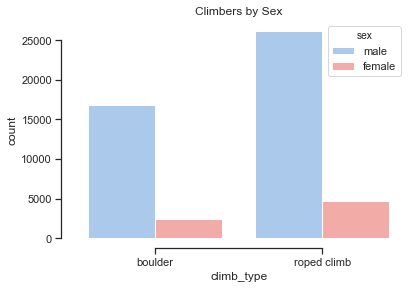

In [5]:
# Plot men vs women
%matplotlib inline
sns.set(style="ticks", palette="pastel")
ax1 = sns.countplot(x="climb_type", hue="sex", data=climbers[climbers["sex"] != "unknown"], palette=["b","r"])
ax1.set_title("Climbers by Sex")
sns.despine(offset=10, trim=True)
plt.show()

Guess not. Reflecting on my own observations regarding female particpation in climbing, I feel inclined to attribute this disparity to 8a.nu being more popular among male climbers than women, rather than a big gender gap in the sport. In my experience, women seem to be less interested in logging their ascents online than men. Unfortunately this means we have less women in the dataset. 
# Height: Do Taller Climbers Have an Unfair Advantage?

One of the key gripes of us shorter climbers concerns the way taller climbers are seemingly able to use their long arms to "cheat" their way through hard moves. Surely if we had just a few extra centermeters of height at our disposal we would be able to climb ten times as many routes?! The 8a.nu dataset contains height data for many users which will enable an investigation into this apparent inequity.

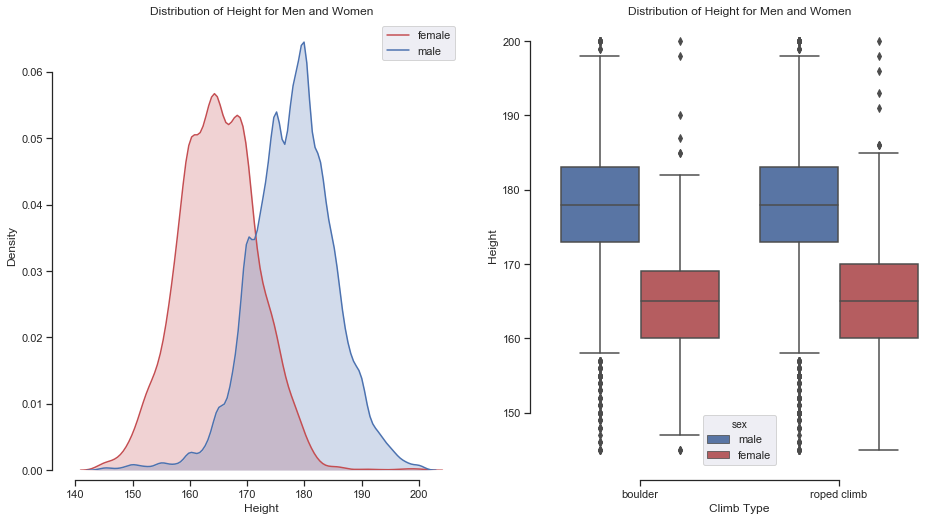

Height Dataset Size = 31873


In [7]:
# Remove climbers with missing values for height
climbers_height = climbers[climbers["height"] > 0].copy()

# Keep height values between 145cm and 200cm
climbers_height = climbers_height[(climbers_height["height"] > 144) & (climbers_height["height"] < 201)]

#Draw density and nested boxplot to show distribution of height
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, sharex=False)
fig.set_size_inches(15.7, 8.27)
sns.set(style="darkgrid")
sns.kdeplot(climbers_height[climbers_height["sex"] == "female"]["height"] , shade=True, color="r", label="female", ax=ax1)
sns.kdeplot(climbers_height[climbers_height["sex"] == "male"]["height"], shade=True, color="b", label="male", ax=ax1)
sns.boxplot(x="climb_type", y="height", hue="sex", palette=["b","r"], data=climbers_height, ax=ax2)
ax1.title.set_text('Distribution of Height for Men and Women')
ax2.title.set_text('Distribution of Height for Men and Women')
ax1.set_ylabel('Density')
ax2.set_ylabel('Height')
ax1.set_xlabel('Height')
ax2.set_xlabel('Climb Type')
sns.despine(offset=10, trim=True)
plt.show()

print("Height Dataset Size = {}".format(climbers_height.shape[0]))

The distribution of height for the 8a.nu is more or less representative of the general population. There are not many very tall or very short climbers in the dataset, and women are quite a bit shorter than men. Lets take a look at height versus maximum grade. Unfortunately the size of dataset has reduced quite significantly due to the height values filter to 31,876 climbers.

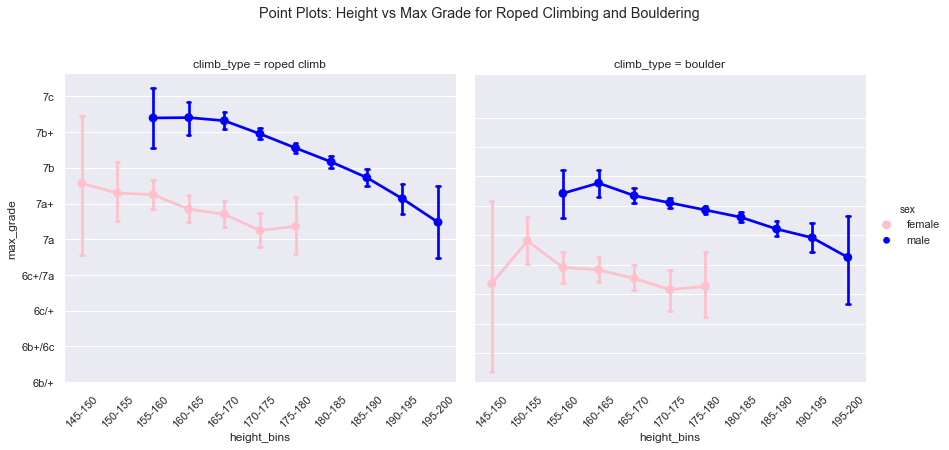

In [12]:
# Create bins for height data
cut_labels = ['145-150', '150-155', '155-160', '160-165', '165-170', '170-175', '175-180', '180-185', '185-190', '190-195', '195-200']
cut_bins = [0, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200]
climbers_height['height_bins'] = pd.cut(climbers_height['height'], bins=cut_bins, labels=cut_labels)

# Break the data into four groups
boulder_female = climbers_height[(climbers_height["sex"] == "female") & (climbers_height["climb_type"] == "boulder")]
rope_female = climbers_height[(climbers_height["sex"] == "female") & (climbers_height["climb_type"] == "roped climb")]
boulder_male = climbers_height[(climbers_height["sex"] == "male") & (climbers_height["climb_type"] == "boulder")]
rope_male = climbers_height[(climbers_height["sex"] == "male") & (climbers_height["climb_type"] == "roped climb")]

# Remove outliers
rope_female = rope_female[(rope_female["height"] > 145) & (rope_female["height"] < 180)]
boulder_female = boulder_female[(boulder_female["height"] > 145) & (boulder_female["height"] < 180)]
rope_male = rope_male[(rope_male["height"] > 155) & (rope_male["height"] < 200)]
boulder_male = boulder_male[(boulder_male["height"] > 155) & (boulder_male["height"] < 200)]

# Concat cleaned data
climbers_height_new = pd.concat([rope_female, boulder_female, rope_male, boulder_male])

# Plot data
sns.set(style="darkgrid")
g = sns.catplot(x="height_bins", y='max_grade', hue="sex",
                   col="climb_type", data=climbers_height_new, sharex=False, sharey=True, kind="point", 
                palette=["pink","blue"], height=6, capsize=.1)
# Change y labels
labels = [41,43,45,47,49,51,53,55,57,59,62]
fra_routes = []
for v in labels:
    fra_routes.append(grades_dictionary[v])
g.set_xticklabels(rotation=45)
g.fig.suptitle("Point Plots: Height vs Max Grade for Roped Climbing and Bouldering")
plt.yticks(labels, fra_routes)
from matplotlib import rcParams
plt.subplots_adjust(top=0.825)
plt.show()

Interestingly it seems that it is taller climbers who are at a disadvantage. This could be due to a number of factors including:

- Harder, steeper climbs can force climbers to contort themselves into unnatural, scrunched up positions which might favor shorter climbers over taller climbers;
- As the the grade of the climb increases the holds generally decrease in size. Taller climbers tend to possess larger than average hands that may struggle to get the most out of these smaller holds;
- Strong, tall climbers are under-represented in the dataset. It is possible there are a number of tall, stronger climbers out there that are just not interested in logging their climbs on 8a.nu;
- Taller climbers weigh more compared to shorter climbers, and high body weight is generally considered to impede climbing performance. 

Lets explore the last point given the dataset also contains weight data. I'll filter the data so that only climbers with weights below 66kg remain and see if height is still negatively correlated. The only tall climbers in the dataset remaining will be very slim to underweight. For this exercise I'll only use data for male rope climbers as this is the largest group in the dataset.

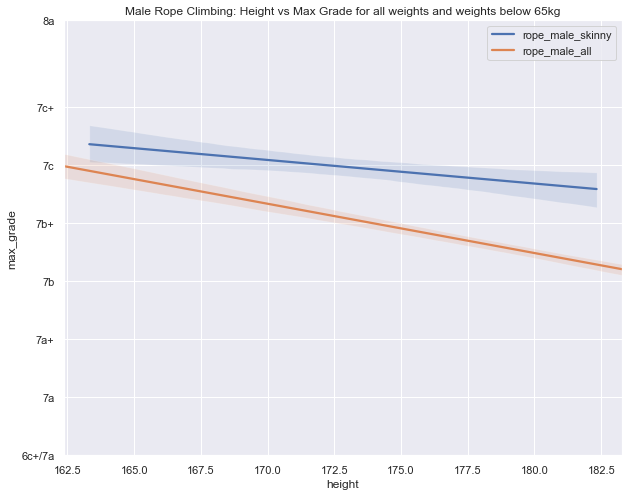

In [9]:
climbers_height_new = climbers_height_new[climbers_height_new["weight"] > 0]
skinny_climbers = climbers_height_new[climbers_height_new["weight"] < 66].copy()
rope_male_skinny = skinny_climbers[(skinny_climbers["sex"] == "male") & (skinny_climbers["climb_type"] == "roped climb")]
rope_male_all = climbers_height_new[(climbers_height_new["sex"] == "male") & (climbers_height_new["climb_type"] == "roped climb")]

# Reg plots
sns.set(rc={'figure.figsize':(10,8)})
sns.set(style="darkgrid")
sns.regplot(x="height", y="max_grade", data=rope_male_skinny, scatter=False, robust=True, label="rope_male_skinny")
sns.regplot(x="height", y="max_grade", data=rope_male_all, scatter=False, robust=True, label="rope_male_all")
# Change y labels
labels = [47,49,51,53,55,57,59,62]
fra_routes = []
for v in labels:
    fra_routes.append(grades_dictionary[v])
    
plt.yticks(labels, fra_routes)
plt.title("Male Rope Climbing: Height vs Max Grade for all weights and weights below 65kg")
plt.legend()
plt.show()

It seems height isn't as much of a barrier to climbing performance once absolute weight is taken into account. Unfortunately though, it isn't really possible for taller climbers to maintain the weight of a much shorter climber without serious health ramifications. For reference, the healthy weight range for a 180cm tall climber is 65-81kg, and for a 190cm tall climber, 72-90kg based on the BMI formula. 


# BMI: How does Weight Influence Climbing Performance?
Climbing is a sport that requires particpants to literally fight gravity. As we know from physics, mass plays a big role in the gravity equation, so it is therefore widely accepted that leaner climbers are at an advantage. Lets see if the 8a.nu data supports this assumption by comparing BMI to the maximum grade. I've used BMI instead of absolute weight because it is a much better metric to compare individuals with similar body types but different heights.

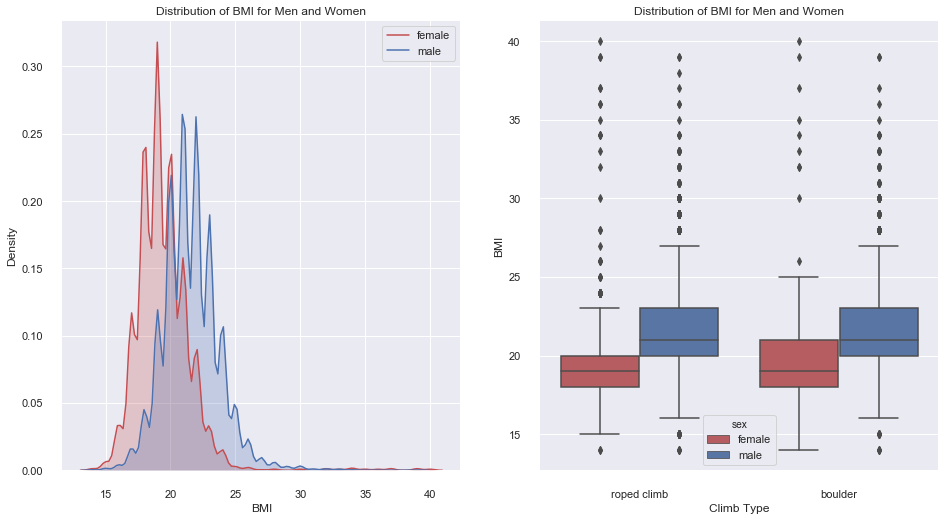

BMI Dataset Size = 28707


In [13]:
# Calculate BMI
climbers_height_new["BMI"] = climbers_height_new["weight"]/((climbers_height_new["height"]/100)**2)
climbers_height_new["BMI"] = climbers_height_new["BMI"].astype(int)

# Filter for realistic values
climbers_BMI = climbers_height_new[(climbers_height_new["BMI"] > 13) & (climbers_height_new["BMI"] < 41)].copy()

#Draw a nested boxplot to show distribution of BMI
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, sharex=False)
fig.set_size_inches(15.7, 8.27)
sns.set(style="darkgrid")
sns.kdeplot(climbers_BMI[climbers_BMI["sex"] == "female"]["BMI"] , shade=True, color="r", label="female", ax=ax1)
sns.kdeplot(climbers_BMI[climbers_BMI["sex"] == "male"]["BMI"], shade=True, color="b", label="male", ax=ax1)
sns.boxplot(x="climb_type", y="BMI",
            hue="sex", palette=["r","b"],
            data=climbers_BMI)
ax1.title.set_text('Distribution of BMI for Men and Women')
ax2.title.set_text('Distribution of BMI for Men and Women')
ax1.set_ylabel('Density')
ax2.set_ylabel('BMI')
ax1.set_xlabel('BMI')
ax2.set_xlabel('Climb Type')
sns.despine(offset=10, trim=True)
plt.show()

print("BMI Dataset Size = {}".format(climbers_BMI.shape[0]))

Looking at the above distribution plots we can see that the women in the dataset have lower BMIs than the men on average. Most climbers have a BMI in the healthy range (18 to 25). As noted previously, climbers in this dataset are climbing fairly hard on average so it is no surprise that most are within the healthy BMI range. 

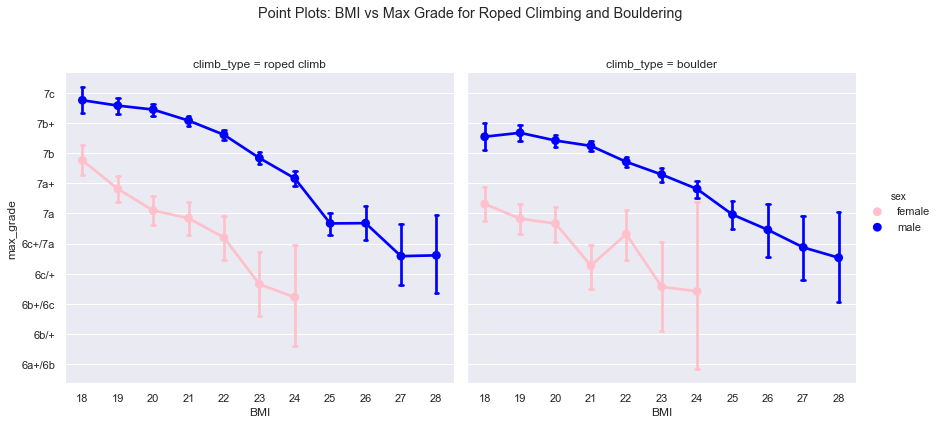

In [14]:
# Keep BMI values between 17 and 28
climbers_BMI = climbers_height_new[(climbers_height_new["BMI"] > 16) & (climbers_height_new["BMI"] < 29)].copy()

# Break the data into four groups again and get rid of BMI outliers
boulder_female_BMI = climbers_BMI[(climbers_BMI["sex"] == "female") & (climbers_BMI["climb_type"] == "boulder")
                         & (climbers_BMI["BMI"] > 17) & (climbers_BMI["BMI"] < 25)]
rope_female_BMI = climbers_BMI[(climbers_BMI["sex"] == "female") & (climbers_BMI["climb_type"] == "roped climb")
                      & (climbers_BMI["BMI"] > 17) & (climbers_BMI["BMI"] < 25)]
boulder_male_BMI = climbers_BMI[(climbers_BMI["sex"] == "male") & (climbers_BMI["climb_type"] == "boulder")
                      & (climbers_BMI["BMI"] > 17) & (climbers_BMI["BMI"] < 29)]
rope_male_BMI = climbers_BMI[(climbers_BMI["sex"] == "male") & (climbers_BMI["climb_type"] == "roped climb")
                    & (climbers_BMI["BMI"] > 17) & (climbers_BMI["BMI"] < 29)]

# Concat data
climbers_BMI_new = pd.concat([boulder_female_BMI, rope_female_BMI, boulder_male_BMI, rope_male_BMI])

# Plot data
sns.set(style="darkgrid")
g = sns.catplot(x="BMI", y='max_grade', hue="sex",
                   col="climb_type", data=climbers_BMI_new, sharex=False, sharey=True, kind="point", 
                palette=["pink","blue"], height=6, capsize=.1, col_order=("roped climb", "boulder"))
# Change y labels
labels = [39,41,43,45,47,49,51,53,55,57]
fra_routes = []
for v in labels:
    fra_routes.append(grades_dictionary[v])
g.fig.suptitle("Point Plots: BMI vs Max Grade for Roped Climbing and Bouldering")
plt.yticks(labels, fra_routes)
from matplotlib import rcParams
plt.subplots_adjust(top=0.825)

As evidenced above, climbers with a lower BMI tend to climb harder on average. For climbers looking to advance in the sport, loosing unncessary body weight is a good idea.
# Age: How do Older Climbers Compare with Younger Climbers?

In many sports, growing older is generally assumed to impede performamce. This makes sense given the fact that as we get older we are more prone to injuries, recovery times increase and it becomes harder to remain at our optimum fighting weight. However, climbing is dissimilar to other sports in the way it requires a large mental component in addition to raw physical strength. In order to get to the top, climbers need strong problem solving abilities, a wide range of technical skills, and the ability to remain calm during fear inducing situations. It can take years to develop and refine these skills, and perhaps because of this, the peak age for climbing may differ to other sports.  

To look at how age is related to performance in climbing I'll calculate the age at which each climber ascended their maximum grade. This will give us an idea of what age climbers are reaching their peak. It will also be interesting to see how many climbers are reaching their peak grades at older ages. 

I'll also introduce a new dataset with all the ascents for all climbers (not just their maximum grade ascent). This way we can look at the average grade for each age. 

In [4]:
# upload datasets
climbers_age = pd.read_csv("/Users/katestone/Desktop/CSV files/max_grade.csv")

#Drop false entries identified previously
climbers_age = climbers_age.drop(index=[31517,37025,38332,42527])

# Replace values in sex and climb_type columns
climbers_age["sex"] = climbers_age["sex"].apply(lambda x: "male" if x == 0 else ("female" if x == 1 else "unknown"))
climbers_age["climb_type"] = climbers_age["climb_type"].apply(lambda x: "roped climb" if x == 0 else ("boulder" if x == 1 else "unknown"))

# Remove climbers with no value for birth
climbers_age["birth"] = climbers_age["birth"].fillna(0)
climbers_age = climbers_age[climbers_age["birth"] != 0]

# Create age column using date data was scraped
climbers_age['birth'] = pd.to_datetime(climbers_age['birth'], errors='coerce')
date = pd.to_datetime("2017-09-13")
climbers_age["age"] = (date - climbers_age['birth']).astype('<m8[Y]')
climbers_age = climbers_age[climbers_age["age"] < 100]


# Keep only climbers with valid ages and known sex
climbers_age = climbers_age[(climbers_age["age"] > 0) & (climbers_age["sex"] != "unknown")]

climbers_age.head()

,id,country,sex,height,weight,started,birth,max_grade,climb_type,year,age
0,1,SWE,male,177,73,1996,1976-10-03,51,boulder,2005,40.0
1,1,SWE,male,177,73,1996,1976-10-03,62,roped climb,2002,40.0
4,3,SWE,male,180,78,1995,1973-09-09,55,boulder,2001,44.0
5,3,SWE,male,180,78,1995,1973-09-09,62,roped climb,2001,44.0
6,4,SWE,female,165,58,2001,1984-07-26,42,boulder,2006,33.0


In [5]:
print("Climbers Age Dataset Size = {}".format(climbers_age.shape[0]))

Climbers Age Dataset Size = 30056


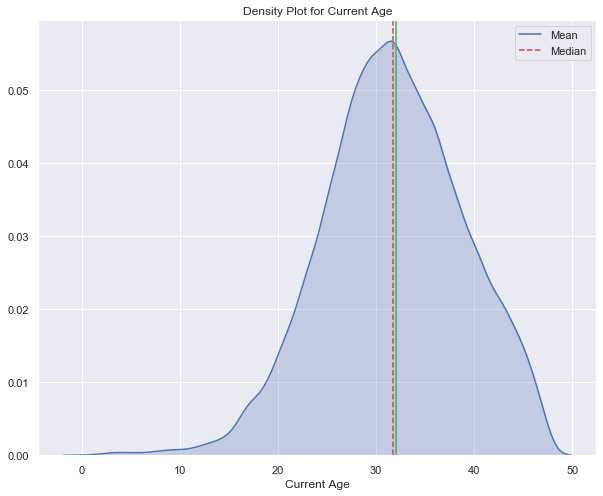

Mean = 31.750532339632684
Median = 32.0


In [8]:
# Density plot for current age
sns.set(rc={'figure.figsize':(10,8)})
sns.kdeplot(climbers_age["age"], shade=True)
mean = plt.axvline(climbers_age["age"].mean(), color='r', linestyle='--')
plt.axvline(climbers_age["age"].median(), color='g', linestyle='-')
plt.legend({'Mean':climbers_age["age"].mean(), 'Median':climbers_age["age"].median()})
plt.title("Density Plot for Current Age")
plt.xlabel("Current Age")
plt.show()

print("Mean = {}".format(climbers_age["age"].mean()))
print("Median = {}".format(climbers_age["age"].median()))

Looking at the distribution of current age we can see that 8a.nu appears to be most popular among climbers in their late 20s to early 30s.

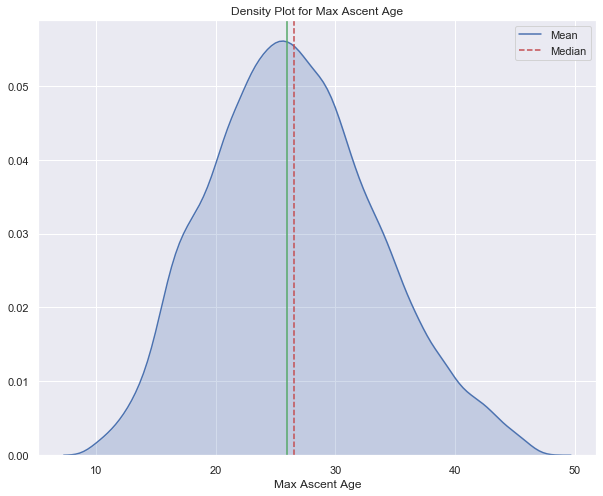

Mean = 26.570537958773254
Median = 26.0


In [9]:
# Calculate age of climber when they climbed their max grade
climbers_age['year'] = pd.to_datetime(climbers_age['year'],format='%Y', errors='coerce')
climbers_age["ascent_age"] = (climbers_age["year"] - climbers_age['birth']).astype('<m8[Y]')
climbers_age = climbers_age[(climbers_age["ascent_age"] > 9) & (climbers_age["ascent_age"] < 51)]

# Density plot for max_ascent age
sns.set(rc={'figure.figsize':(10,8)})
sns.kdeplot(climbers_age["ascent_age"], shade=True)
mean_all = plt.axvline(climbers_age["ascent_age"].mean(), color='r', linestyle='--')
plt.axvline(climbers_age["ascent_age"].median(), color='g', linestyle='-')
plt.legend({'Mean':climbers_age["ascent_age"].mean(), 'Median':climbers_age["ascent_age"].median()})
plt.title("Density Plot for Max Ascent Age")
plt.xlabel("Max Ascent Age")
plt.show()

print("Mean = {}".format(climbers_age["ascent_age"].mean()))
print("Median = {}".format(climbers_age["ascent_age"].median()))

It seems that most climbers in the dataset are reaching their peak performance in their 20s. There are still quite a few people reaching their peak in their late 30s and 40s which is interesting. 

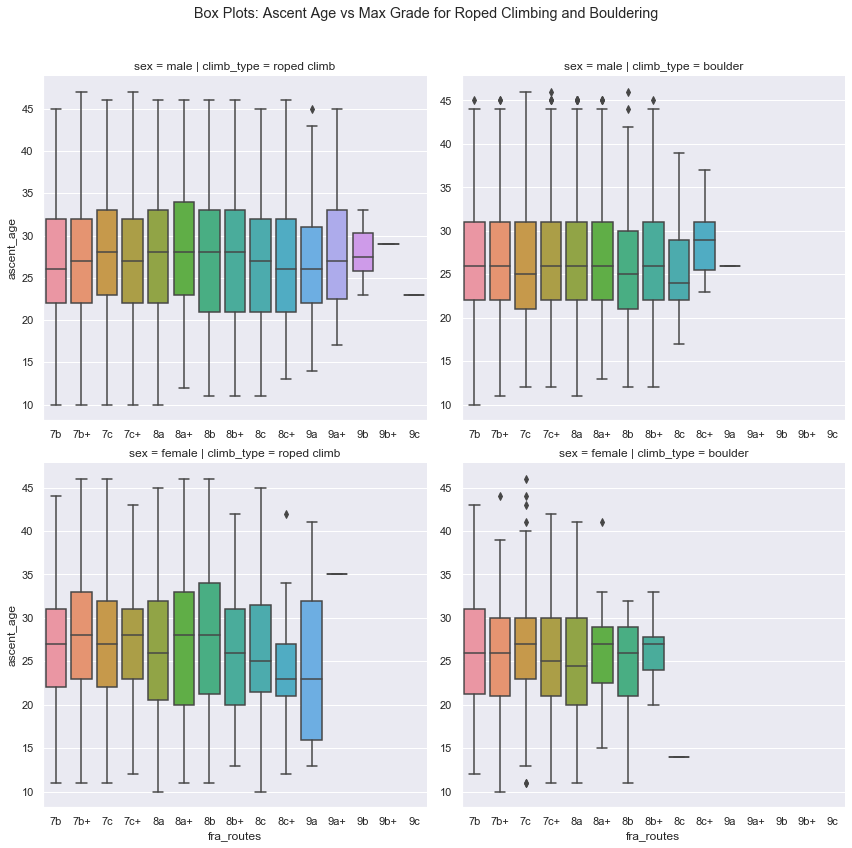

In [19]:
# Create function to get new series with french grades
def update_grade(x):
    v = grades_dictionary[x]
    return v

climbers_age["fra_routes"] = climbers_age["max_grade"].apply(update_grade)

# Plot data
sns.set(style="darkgrid")
g = sns.catplot(x="fra_routes", y='ascent_age', row="sex",
                   col="climb_type", data=climbers_age[climbers_age["max_grade"] > 52], sharex=False, sharey=False, kind="box", 
                height=6, col_order=("roped climb", "boulder"), order=('7b','7b+','7c','7c+','8a','8a+','8b','8b+','8c','8c+',
                                                                       '9a','9a+','9b','9b+','9c'))
g.fig.suptitle("Box Plots: Ascent Age vs Max Grade for Roped Climbing and Bouldering")
from matplotlib import rcParams
plt.subplots_adjust(top=0.9)
plt.show()

The above plots show the distribution of age for climbing grades 7b and upwards. We can see that there are a number of climbers in their 30s and 40s climbing at a very impressive level, which is encouraging. It would seem that climbers who train hard and are dedicated enough can reach new peaks beyond their 20s.    

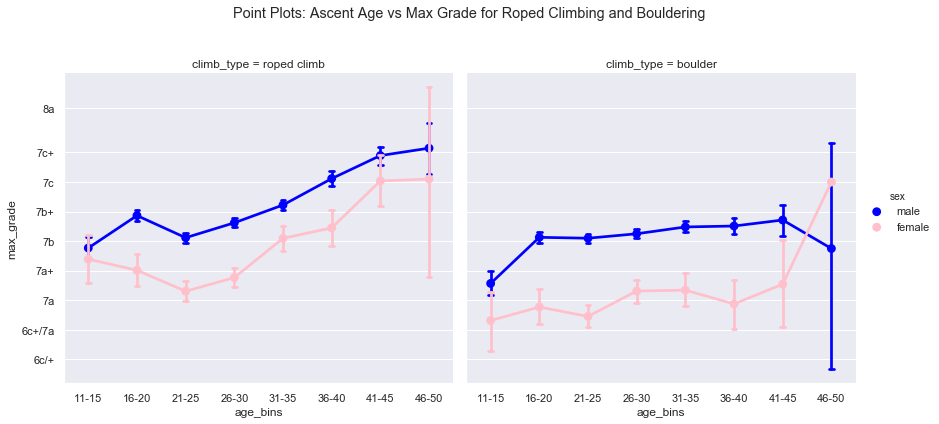

In [20]:
# Create bins for height data
cut_labels = ['11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50']
cut_bins = [0, 15, 20, 25, 30, 35, 40, 45, 50]
climbers_age['age_bins'] = pd.cut(climbers_age['ascent_age'], bins=cut_bins, labels=cut_labels) 

# Plot data
sns.set(style="darkgrid")
g = sns.catplot(x="age_bins", y='max_grade', hue="sex",
                   col="climb_type", data=climbers_age, sharex=False, sharey=True, kind="point", 
                palette=["blue","pink"], height=6, capsize=.1, col_order=("roped climb", "boulder"))

g.fig.suptitle("Point Plots: Ascent Age vs Max Grade for Roped Climbing and Bouldering")
# Change y labels
labels = [45,47,49,51,53,55,57,59,62]
fra_routes = []
for v in labels:
    fra_routes.append(grades_dictionary[v])
plt.yticks(labels, fra_routes)
from matplotlib import rcParams
plt.subplots_adjust(top=0.825)

Looking at these point plots of age vs maximum grade we can see that the average peak grade actually increases as age increases. While there might not be many older climbers in the dataset reaching new peaks, the ones that are, are reaching more impressive peaks on average than the younger climbers in the dataset. This illustrates once again that climbers who are dedicated enough can continue progressing past their 20s. 
# Gap Between Age and Maximum Grade Ascent Age

Another thing that might be interesting to look at is the gap between the climbers age and the age at which they climbed their highest grade. 

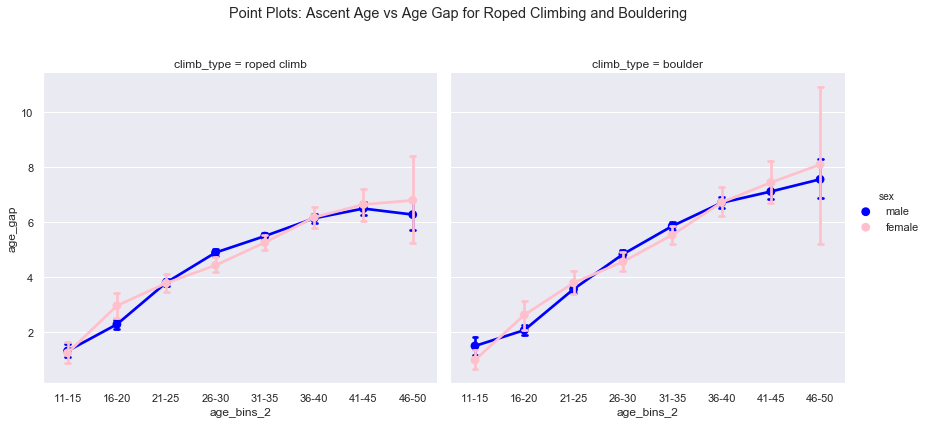

In [27]:
# Calculate age difference
climbers_age["age_gap"] = climbers_age["age"] - climbers_age["ascent_age"]

#Create age bins for age
cut_labels = ['11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50']
cut_bins = [0, 15, 20, 25, 30, 35, 40, 45, 50]
climbers_age['age_bins_2'] = pd.cut(climbers_age['age'], bins=cut_bins, labels=cut_labels)  

# Plot data
sns.set(style="darkgrid")
g = sns.catplot(x="age_bins_2", y='age_gap', hue="sex",
                   col="climb_type", data=climbers_age, sharex=False, sharey=True, kind="point", 
                palette=["blue","pink"], height=6, capsize=.1, col_order=("roped climb", "boulder"))

g.fig.suptitle("Point Plots: Ascent Age vs Age Gap for Roped Climbing and Bouldering")
from matplotlib import rcParams
plt.subplots_adjust(top=0.825)

It appears the difference in age between the climber's maximum grade ascent age and their current age increases as age increases. While their are a number of climbers in the dataset reaching new peaks in their later years of climbing, this is not the norm. 
# All Ascents Data

Next we'll take a look at the all ascents dataset which contains all the routes logged by each climber, not just their maximum grade ascent. From this data we'll look at what age group is logging the most ascents on 8a.nu and how the average grade changes for different ascent ages. 

In [21]:
# upload all_ascents dataset
all_ascents = pd.read_csv("/Users/katestone/Desktop/CSV files/all_ascents.csv")

# Replace values in sex and climb_type columns
all_ascents["sex"] = all_ascents["sex"].apply(lambda x: "male" if x == 0 else ("female" if x == 1 else "unknown"))
all_ascents["climb_type"] = all_ascents["climb_type"].apply(lambda x: "roped climb" if x == 0 else ("boulder" if x == 1 else "unknown"))

# Remove climbers with no value for birth
all_ascents["birth"] = all_ascents["birth"].fillna(0)
all_ascents = all_ascents[all_ascents["birth"] != 0]

# Create age column using date data was scraped
all_ascents['birth'] = pd.to_datetime(all_ascents['birth'], errors='coerce')
date = pd.to_datetime("2017-09-13")
all_ascents["age"] = (date - all_ascents['birth']).astype('<m8[Y]')
all_ascents = all_ascents[(all_ascents["age"] > 0) & (all_ascents["age"] < 100)]

# Remove unknown sex values for all ascents data
all_ascents = all_ascents[all_ascents["sex"] != "unknown"]

all_ascents.head()

,id,city,country,sex,height,weight,started,birth,grade_id,ascent_year,climb_type,age
0,1,Göteborg,SWE,male,177,73,1996,1976-03-10,36,1999,roped climb,41.0
1,1,Göteborg,SWE,male,177,73,1996,1976-03-10,36,1999,roped climb,41.0
2,1,Göteborg,SWE,male,177,73,1996,1976-03-10,36,1999,roped climb,41.0
3,1,Göteborg,SWE,male,177,73,1996,1976-03-10,36,1999,roped climb,41.0
4,1,Göteborg,SWE,male,177,73,1996,1976-03-10,36,1999,roped climb,41.0


In [59]:
all_ascents.shape[0]

3202466

This dataset is alot larger than the last one as it contains ALL ascents for each climber, not just their maximum grade ascent. I would say its fairly likely that many climbers in the dataset are guilty of selectively logging their ascents (I'm definitely guilty of this), so it's probably best to take the analysis of this data with a grain of salt. 

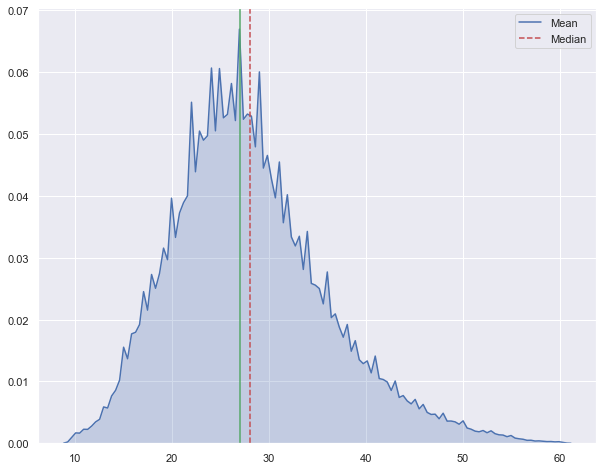

Mean = 28.05160645923572
Median = 27.0


In [22]:
# Calculate ascent age for all_ascents data
all_ascents["ascent_year"] =  pd.to_datetime(all_ascents["ascent_year"],format='%Y', errors='coerce')
all_ascents["ascent_age"] = (all_ascents["ascent_year"] - all_ascents["birth"]).astype('<m8[Y]')

# Remove climbers with no value for ascent age
all_ascents["ascent_age"] = all_ascents["ascent_age"].fillna(0)
all_ascents = all_ascents[all_ascents["ascent_age"] != 0]
all_ascents = all_ascents[(all_ascents["ascent_age"] > 9) & (all_ascents["ascent_age"] < 61)]

# Density plot for height
sns.set(rc={'figure.figsize':(10,8)})
sns.kdeplot(all_ascents["ascent_age"], shade=True)
mean = plt.axvline(all_ascents["ascent_age"].mean(), color='r', linestyle='--')
plt.axvline(all_ascents["ascent_age"].median(), color='g', linestyle='-')
plt.legend({'Mean':all_ascents["ascent_age"].mean(), 'Median':all_ascents["ascent_age"].median()})
plt.show()

print("Mean = {}".format(all_ascents["ascent_age"].mean()))
print("Median = {}".format(all_ascents["ascent_age"].median()))

From this plot we can see that climbers in their 20s and early 30s are logging the most ascents on 8a.nu. This might be because climbers in this age group have more time on their hands to go climbing outdoors compared to younger climbers who may have school commitments and older climbers who may have family commitments. 

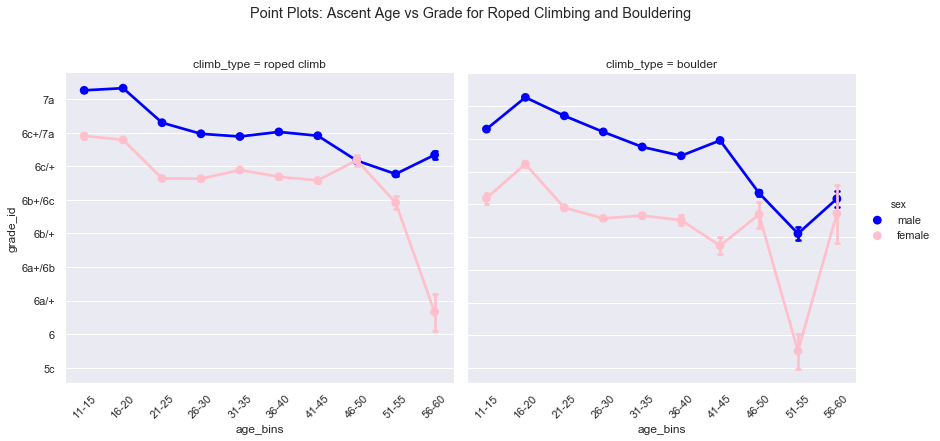

In [23]:
# Create bins for ascent age data
cut_labels = ['11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55','56-60']
cut_bins = [0, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
all_ascents['age_bins'] = pd.cut(all_ascents['ascent_age'], bins=cut_bins, labels=cut_labels)                         


# Plot data
sns.set(style="darkgrid")
g = sns.catplot(x="age_bins", y='grade_id', hue="sex",
                   col="climb_type", data=all_ascents, sharex=False, sharey=True, kind="point", 
                palette=["blue","pink"], height=6, capsize=.1, col_order=("roped climb", "boulder"))
# Change y labels
labels = [33,35,37,39,41,43,45,47,49,51]
fra_routes = []
for v in labels:
    fra_routes.append(grades_dictionary[v])
plt.yticks(labels, fra_routes)
g.fig.suptitle("Point Plots: Ascent Age vs Grade for Roped Climbing and Bouldering")
g.set_xticklabels(rotation=45)
from matplotlib import rcParams
plt.subplots_adjust(top=0.825)

From these charts we can see that average grade decreases slightly as ascent age increases. While it is definitely possible for older climbers to climb hard grades (as evidenced previously), they don't seem to be logging as higher proportion of hard ascents on 8a.nu as younger climbers. This makes sense given how taxing climbing difficult grades can be on the human body. It is only natural that as we age and become more injury prone that the impact of climbing hard on the body increases. For this reason it is not really surprising that the volume of hard climbing decreases as age increases.

# Experience: How Long does it Take to Climb Hard Grades?

It's generally accepted that climbing at an expert level takes many years of practice. It's rare for climbing prodigies to emerge after only a few years of refining their climbing skills. Lets circle back to the dataset filtered only for maximum grade ascents to see how many years of experience it takes to climb at an impressive level. 

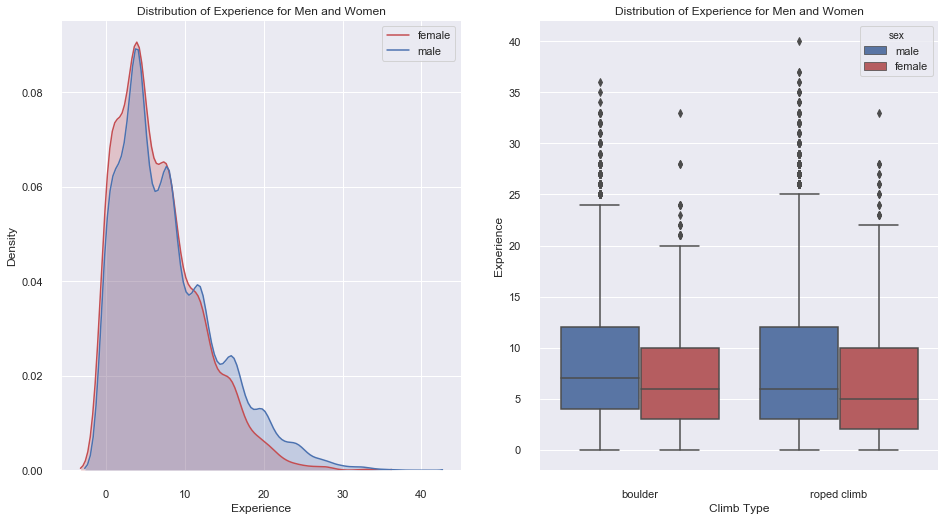

In [24]:
# Calculate experience level when climber did there max grade ascent
climbers_age = climbers_age[climbers_age["started"] != 0]
climbers_age['started'] = pd.to_datetime(climbers_age['started'],format='%Y', errors='coerce')
climbers_age["experience"] = (climbers_age["year"] - climbers_age["started"]).astype('<m8[Y]')
climbers_age = climbers_age[(climbers_age["experience"] >= 0) & (climbers_age["experience"] <= 40)]

#Draw a nested boxplot to show distribution of BMI
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, sharex=False)
fig.set_size_inches(15.7, 8.27)
sns.set(style="darkgrid")
sns.kdeplot(climbers_age[climbers_age["sex"] == "female"]["experience"] , shade=True, color="r", label="female", ax=ax1)
sns.kdeplot(climbers_age[climbers_age["sex"] == "male"]["experience"], shade=True, color="b", label="male", ax=ax1)
sns.boxplot(x="climb_type", y="experience",
            hue="sex", palette=["b","r"],
            data=climbers_age)
ax1.title.set_text('Distribution of Experience for Men and Women')
ax2.title.set_text('Distribution of Experience for Men and Women')
ax1.set_ylabel('Density')
ax2.set_ylabel('Experience')
ax1.set_xlabel('Experience')
ax2.set_xlabel('Climb Type')
sns.despine(offset=10, trim=True)
plt.show()

Most climbers in the dataset had under 20 years experience when they sent their maximum grade. This reflects the observation made previoulsy that for most climbers in the dataset, grade progression stops after a certain point. 

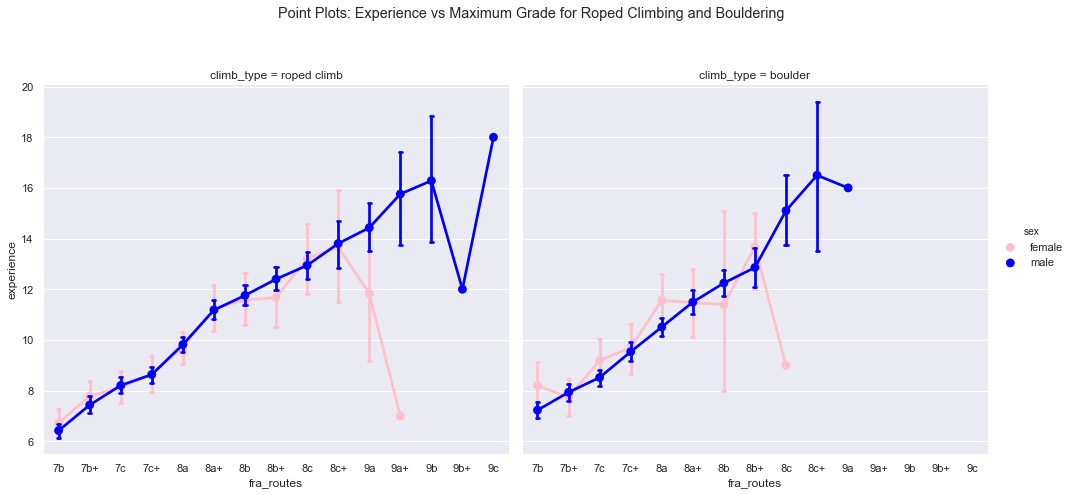

In [25]:
# Remove outliers
women = climbers_age[climbers_age["sex"] == "female"]
men = climbers_age[climbers_age["sex"] == "male"]

women = women[women["experience"] < 21]
men = men[men["experience"] < 26]

climbers_age_new = pd.concat([women, men])

# Plot data
sns.set(style="darkgrid")
g = sns.catplot(y="experience", x='fra_routes', hue="sex",
                   col="climb_type", data=climbers_age_new[climbers_age_new["max_grade"] > 52], sharex=False, sharey=True, kind="point", 
                palette=["pink","blue"], height=7, capsize=.1, col_order=("roped climb", "boulder"),
               order=('7b','7b+','7c','7c+','8a','8a+','8b','8b+','8c','8c+',
                                                                       '9a','9a+','9b','9b+','9c'))
g.fig.suptitle("Point Plots: Experience vs Maximum Grade for Roped Climbing and Bouldering")
from matplotlib import rcParams
plt.subplots_adjust(top=0.825)

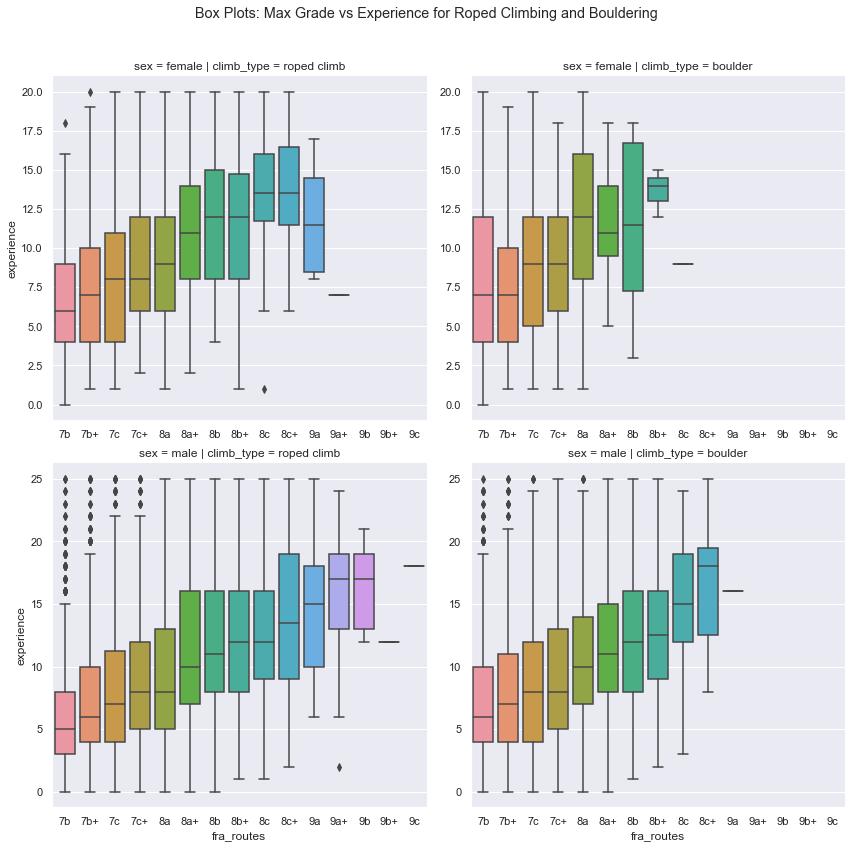

In [26]:
# Box plots
sns.set(style="darkgrid")
g = sns.catplot(x="fra_routes", y='experience', row="sex",
                   col="climb_type", data=climbers_age_new[climbers_age_new["max_grade"] > 52], sharex=False, sharey=False, kind="box", 
                height=6, col_order=("roped climb", "boulder"), order=('7b','7b+','7c','7c+','8a','8a+','8b','8b+','8c','8c+',
                                                                       '9a','9a+','9b','9b+','9c'))
g.fig.suptitle("Box Plots: Max Grade vs Experience for Roped Climbing and Bouldering")
from matplotlib import rcParams
plt.subplots_adjust(top=0.9)
plt.show()

As we can see from the above charts, maximum grade increases as experience level increases. While there are a number of people who are seemingly able to climb impressive grades within a short period of time, it appears that most climbers are gradually progressing as they gain more experience. 
# Conclusions

Analysing the 8a.nu data revealed variables such as height, weight, experience and age influence climbing performance as follows:
- Height: Climbing performance (measured by maximum grade) decreases as height increases. This appears to be driven by the higher absolute weight of taller climbers;
- BMI: Climbers with a high BMI perform worse on average compared to climbers with a low BMI. Being a sport that requires particpants to fight gravity, it is no surprise that carrying excess weight hinders performance.
- Age: 
    - Most climbers seem to peak in their late 20s to early 30s. There are however a few climbers reaching impressive peaks beyond this age group which indicates continuous progression is possible for those that are dedicated enough. 
    - Younger climbers appear to be climbing a higher volume of hard routes compared to older climbers. 
- Experience: Experience is postively correlated with climbing performance. The more years a climber spends refining their climbing skills, the better they get.  